In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('GDP.csv')

In [3]:
print(df)

          country  1960  1961  1962  1963  1964  1965  1966  1967  1968  ...  \
0           Aruba   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1     Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2          Angola   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3         Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
..            ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
206         Samoa   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
207         Yemen   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
208  South Africa  3970  4010  4140  4310  4510  4640  4700  4880  4930  ...   
209        Zambia  1200  1180  1110  1110  1210  1370  1250  1310  1280  ...   
210      Zimbabwe  1140  1170  1150  1190  1140  1160  1140  1200  1180  ...   

      2012   2013   2014   2015   2016 

In [4]:
#Drop countries which has NaN
df_drop=df.dropna(axis=0)

In [5]:
print(df_drop)

                            country   1960   1961   1962   1963   1964   1965  \
6                         Argentina   7410   7690   7500   6990   7570   8240   
10                        Australia  19.9k    20k  19.8k  20.6k  21.7k  22.5k   
11                          Austria  12.1k  12.6k  12.9k  13.4k  14.1k  14.5k   
13                          Burundi    291    245    260    265    274    277   
14                          Belgium  11.7k  12.3k  12.9k  13.3k  14.1k  14.5k   
..                              ...    ...    ...    ...    ...    ...    ...   
200                   United States  19.1k  19.3k  20.1k  20.7k  21.6k  22.7k   
202  St. Vincent and the Grenadines   1890   1940   1980   1830   1860   1850   
208                    South Africa   3970   4010   4140   4310   4510   4640   
209                          Zambia   1200   1180   1110   1110   1210   1370   
210                        Zimbabwe   1140   1170   1150   1190   1140   1160   

      1966   1967   1968  .

In [6]:
#Convert k to thousand
for i in range(1960, 2022):
  contains_k=df_drop[str(i)].str.contains('k')
  df_drop.loc[contains_k, str(i)]=df_drop.loc[contains_k, str(i)].replace({"k": ""}, regex=True).astype('float')*1000

<ipython-input-6-931b6668d98d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop.loc[contains_k, str(i)]=df_drop.loc[contains_k, str(i)].replace({"k": ""}, regex=True).astype('float')*1000


In [7]:
#Transpose
df_transpose=df_drop.T
print(df_transpose)

               6          10       11       13       14     15            16   \
country  Argentina  Australia  Austria  Burundi  Belgium  Benin  Burkina Faso   
1960          7410    19900.0  12100.0      291  11700.0    657           244   
1961          7690    20000.0  12600.0      245  12300.0    668           250   
1962          7500    19800.0  12900.0      260  12900.0    634           262   
1963          6990    20600.0  13400.0      265  13300.0    653           254   
...            ...        ...      ...      ...      ...    ...           ...   
2017       13600.0    57700.0  45300.0      278  41800.0   1070           671   
2018       13100.0    58500.0  46200.0      274  42400.0   1110           696   
2019       12700.0    58900.0  46600.0      270  43100.0   1150           716   
2020       11300.0    58100.0  43500.0      263  40600.0   1160           710   
2021       12400.0    59300.0  45200.0      261  42900.0   1210           740   

                17       20

In [8]:
#Replace old columns with the name of the countries
df_transpose.columns=df_transpose.iloc[0]
df_transpose=df_transpose.drop(index='country')

In [10]:
df_transpose.astype('float').corr()

country,Argentina,Australia,Austria,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bahamas,Belize,...,Togo,Thailand,Trinidad and Tobago,Turkey,Uruguay,United States,St. Vincent and the Grenadines,South Africa,Zambia,Zimbabwe
country,,,,,,,,,,,,,,,,,,,,,
Argentina,1.000000,0.875375,0.849370,-0.296485,0.847125,0.830104,0.868448,0.780806,0.427217,0.771848,...,0.333410,0.861179,0.912012,0.866349,0.901469,0.843184,0.847901,0.837852,0.220313,-0.122243
Australia,0.875375,1.000000,0.985159,-0.280012,0.986412,0.954351,0.960332,0.861399,0.621712,0.943881,...,0.266576,0.985622,0.920944,0.956575,0.934568,0.994266,0.985315,0.710223,-0.032970,-0.143948
Austria,0.849370,0.985159,1.000000,-0.151734,0.999176,0.905493,0.908363,0.777602,0.670677,0.970841,...,0.250337,0.963339,0.877212,0.911817,0.885137,0.991340,0.958241,0.646107,-0.175230,-0.058694
Burundi,-0.296485,-0.280012,-0.151734,1.000000,-0.152234,-0.401631,-0.421025,-0.519616,0.084878,-0.152195,...,0.138366,-0.318767,-0.437268,-0.351823,-0.403693,-0.229573,-0.363631,-0.320552,-0.498197,0.559802
Belgium,0.847125,0.986412,0.999176,-0.152234,1.000000,0.911660,0.912347,0.785165,0.664795,0.968259,...,0.271744,0.964301,0.874826,0.917490,0.886710,0.992910,0.958648,0.652541,-0.165916,-0.053647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,0.843184,0.994266,0.991340,-0.229573,0.992910,0.941184,0.941575,0.836156,0.659519,0.957474,...,0.259968,0.980715,0.884883,0.944697,0.912396,1.000000,0.978712,0.654528,-0.114959,-0.109945
St. Vincent and the Grenadines,0.847901,0.985315,0.958241,-0.363631,0.958648,0.955956,0.967960,0.895639,0.590990,0.926390,...,0.166353,0.991148,0.918947,0.962388,0.945031,0.978712,1.000000,0.673103,0.001731,-0.243665
South Africa,0.837852,0.710223,0.646107,-0.320552,0.652541,0.748292,0.769410,0.727295,0.293260,0.515771,...,0.530633,0.668956,0.851095,0.743358,0.743509,0.654528,0.673103,1.000000,0.522466,-0.253517


<ipython-input-40-ce2f3545adaf>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11,8,count)


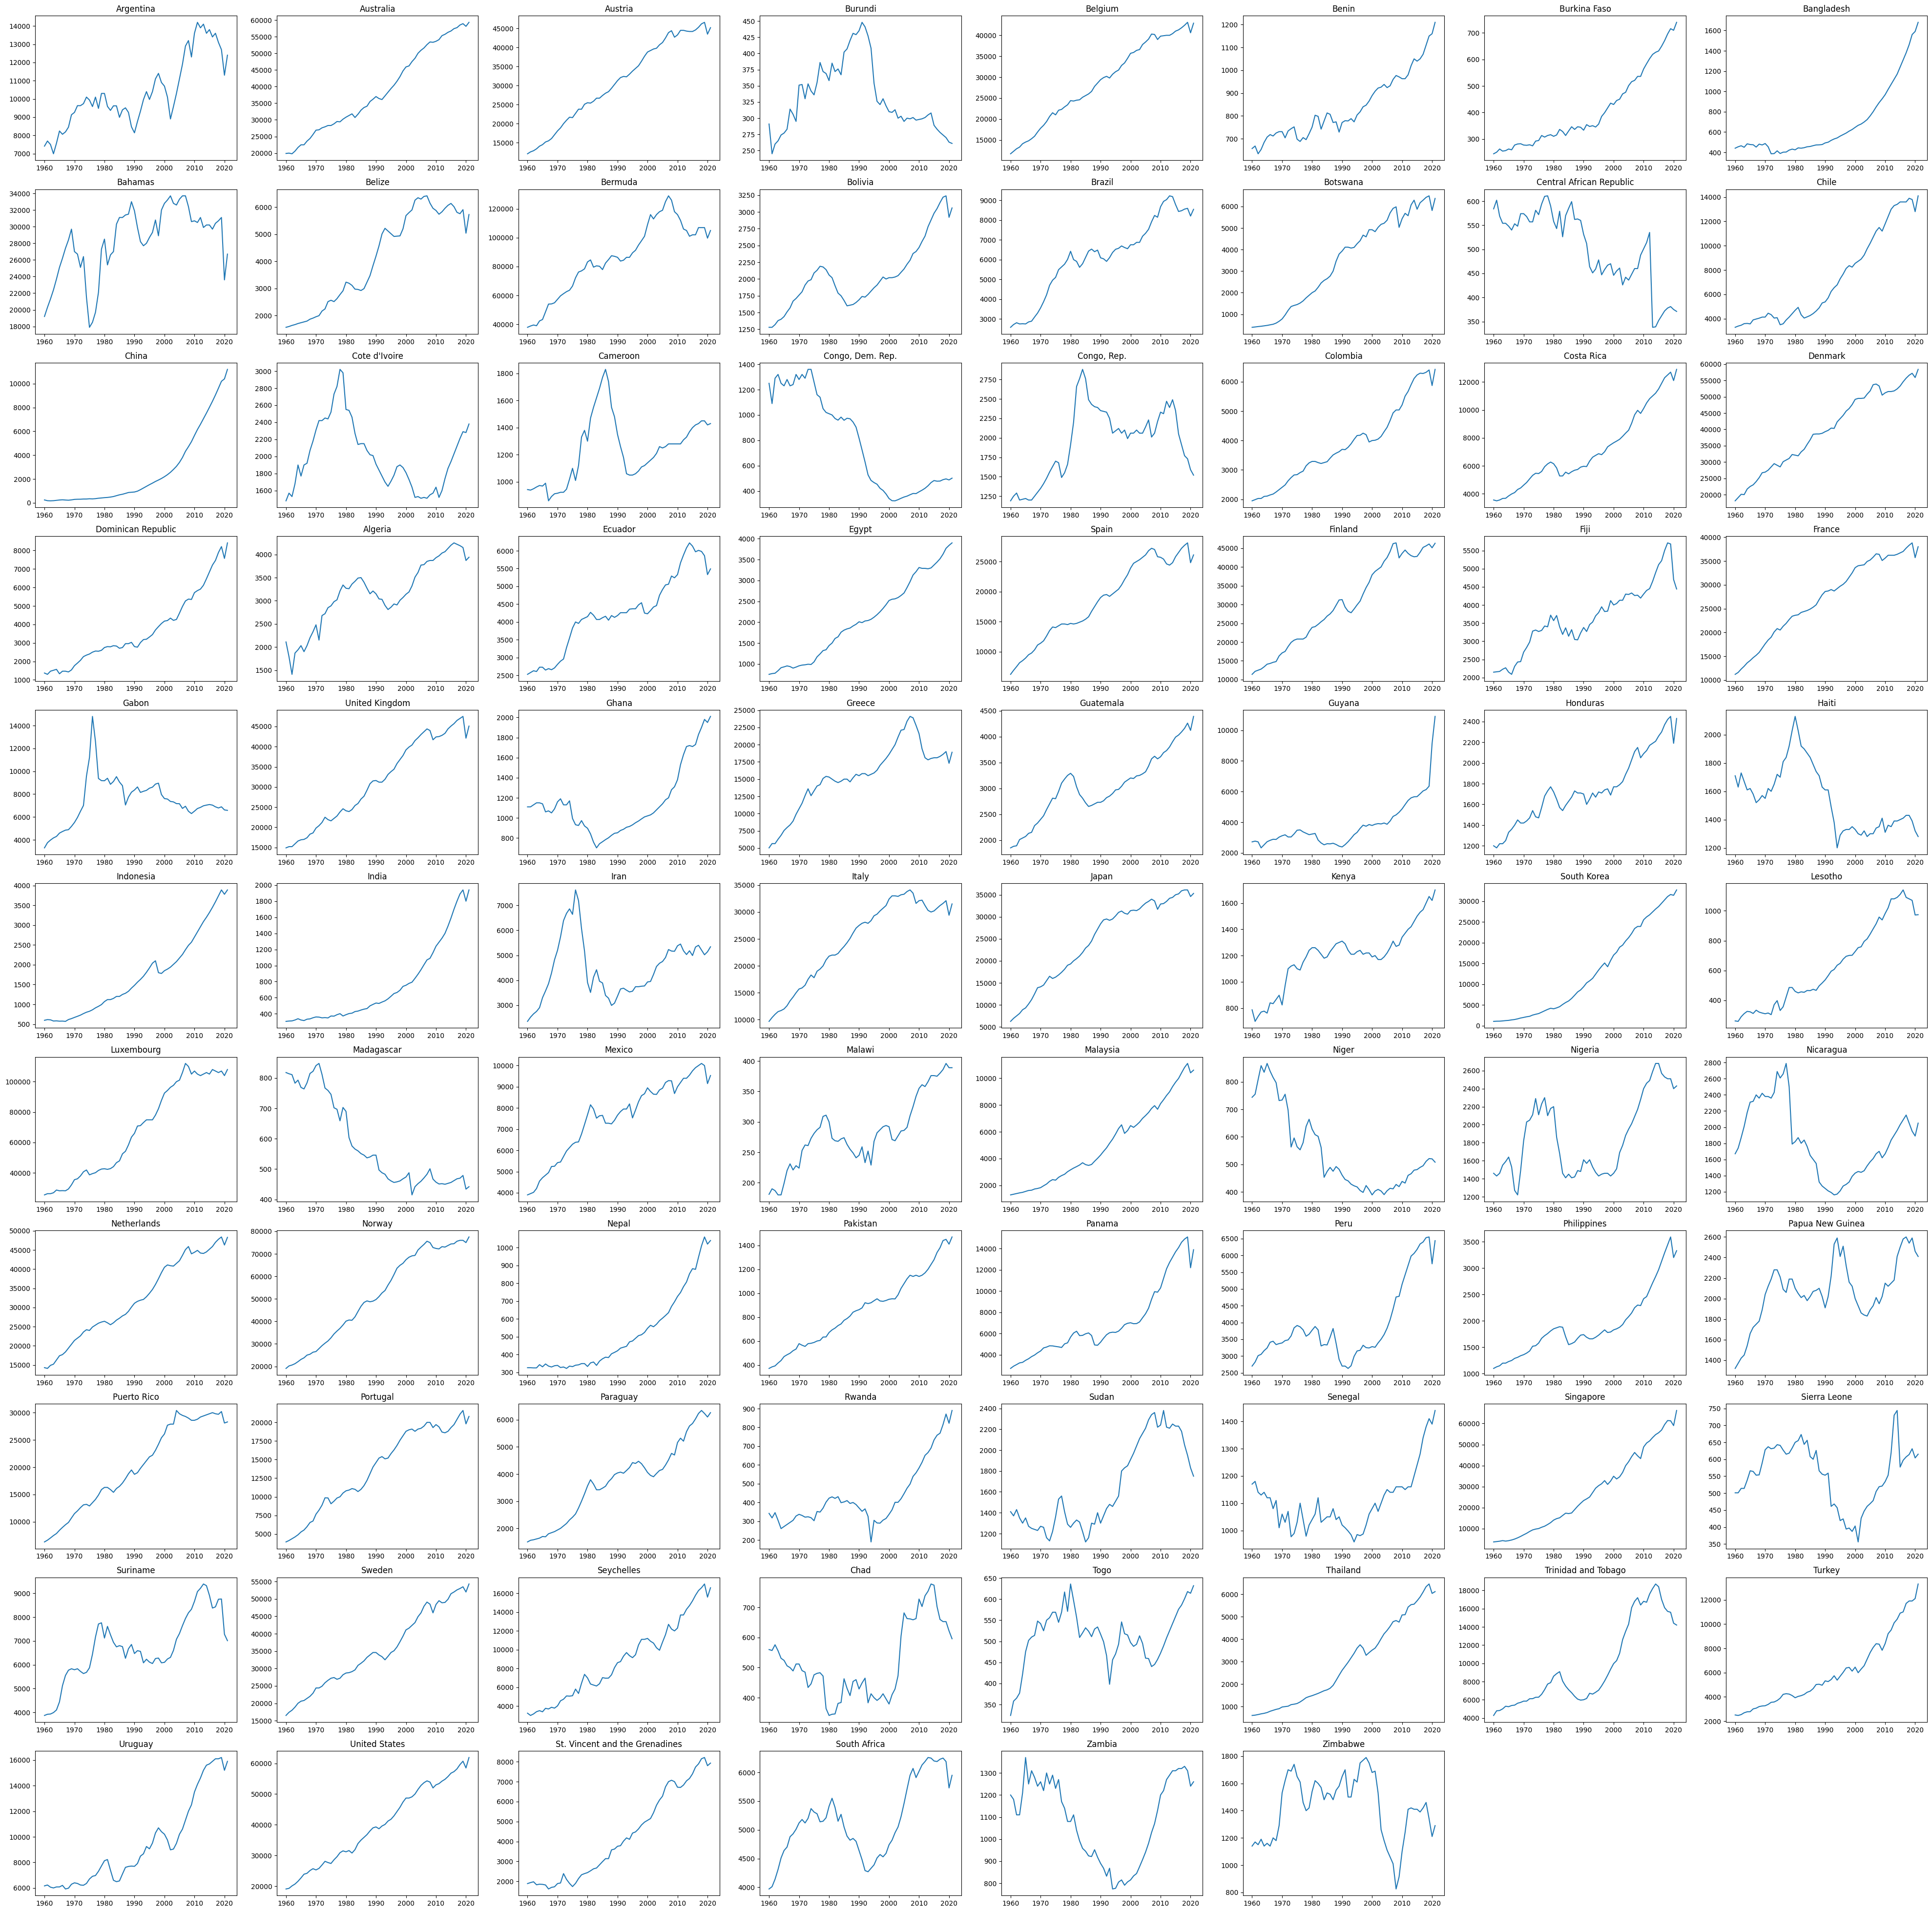

In [40]:
#Visualize GDPs
#Each plot has different scaling
count=1
plt.subplots(figsize=(50,50))
for i in df_transpose.columns:
  plt.subplot(11,8,count)
  df_transpose[i].astype('float').plot()
  count+=1
  plt.title(i)
plt.show()

Index(['Argentina', 'Australia', 'Austria', 'Burundi', 'Belgium', 'Benin',
       'Burkina Faso', 'Bangladesh', 'Bahamas', 'Belize', 'Bermuda', 'Bolivia',
       'Brazil', 'Botswana', 'Central African Republic', 'Chile', 'China',
       'Cote d'Ivoire', 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Colombia', 'Costa Rica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Spain', 'Finland', 'Fiji', 'France', 'Gabon',
       'United Kingdom', 'Ghana', 'Greece', 'Guatemala', 'Guyana', 'Honduras',
       'Haiti', 'Indonesia', 'India', 'Iran', 'Italy', 'Japan', 'Kenya',
       'South Korea', 'Lesotho', 'Luxembourg', 'Madagascar', 'Mexico',
       'Malawi', 'Malaysia', 'Niger', 'Nigeria', 'Nicaragua', 'Netherlands',
       'Norway', 'Nepal', 'Pakistan', 'Panama', 'Peru', 'Philippines',
       'Papua New Guinea', 'Puerto Rico', 'Portugal', 'Paraguay', 'Rwanda',
       'Sudan', 'Senegal', 'Singapore', 'Sierra Leone', 'Suriname', 'Sweden',
       'Seychelles', 'C

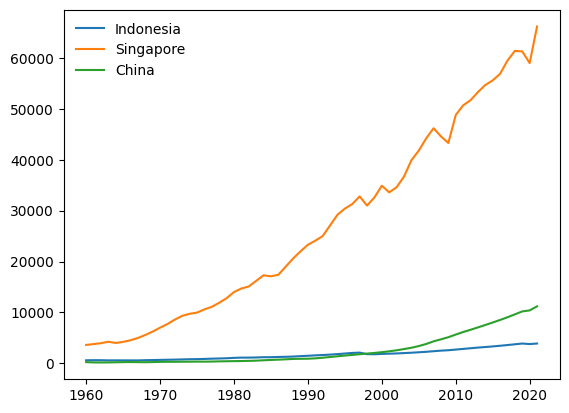

In [48]:
#compare some countries
print(df_transpose.columns)
countries=input("Countries to compare (seperate with comma): ")
list_country=countries.split(',')
for i in list_country:
  df_transpose[i].astype('float').plot()
plt.legend(frameon=False)
plt.show()